In [3]:

def AND(x1,x2):
    w1,w2,theta = 0.5,0.5, 0.7
    temp = x1*w1 + x2*w2
    return int(temp>theta)

def AND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.7
    temp=np.sum(w*x)+b
    return int(temp>0);
def NAND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5])
    b=0.7
    temp=np.sum(w*x)+b
    return int(temp>0)
def OR(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.2
    temp=np.sum(w*x)+b
    return int(temp>0)
    


0

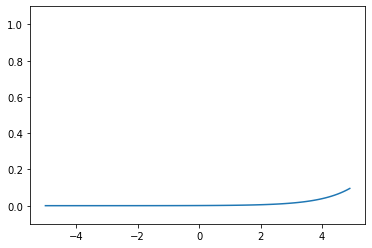

In [36]:
import numpy as np;
import matplotlib.pylab as plt

def step_function(x):
    return (x>0).astype(np.int64)
def sigmoid(x):
    return 1/(1+np.exp(-x))
def relu(x):
    return np.maximum(0,x)

def soft_max(a):
    c=np.max(a)
    ea=np.exp(a-c)
    sum_a=np.sum(ea)
    return ea/sum_a

x=np.array([i/10 for i in range(-50,50)])
y=soft_max(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()


In [45]:
def sum_squares_error(y,t):
    return 0.5 * np.sum((y-t)**2)

# def cross_entropy_error(y,t):
#     delta=1e-7
#     return -np.sum(t*np.log(y+delta))

# def cross_entropy_error_mini(y,t):
#     if y.ndim ==1:
#         t=t.reshape(1,t.size)
#         y=y.reshape(1,y.size)
#     batch_size=y.shape[0]
#     return -np.sum(t*np.log(y+1e-7))/batch_size
def cross_entropy(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    batch_size=y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t] + 1e-7))/batch_size
def differential(f,x):
    h=1e-4
    return(f(x+h)-f(x-h))/(2*h)

def gradient(f, x):
    
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val  # 값 복원
        it.iternext()

    return grad

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x =init_x
    
    for i in range(step_num):
        grad=gradient(f,x)
        x-=lr*grad;
    return x;


In [43]:
import os, os
sys.path.append(os.pardir)
class simpleNet:
    def __init__(self):
        self.W=np.random.randn(2,3)
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self,x,t):
        z=self.predict(x)
        y=soft_max(z)
        loss = cross_entropy(y,t)
        return loss
net = simpleNet();
print(net.W)
x=np.array([0.5, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))
t=np.array([0,0,1])
net.loss(x,t)

[[-1.23682187  0.60081823  1.07674866]
 [-1.3378215   1.20990301  1.30186218]]
[-1.82245029  1.38932182  1.7100503 ]
2


9.072870921456747

In [47]:
net_loss=lambda w: net.loss(x,t)

dW = gradient(net_loss, net.W)







array([[-0.97500761,  0.12023815,  0.85476946],
       [-1.7550137 ,  0.21642867,  1.53858503]])